<a href="https://colab.research.google.com/github/WojciechSokolowski/Qiskit_Projects/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Qiskit

!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit_aer

In [ ]:


from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister



**Add clasical with measuring last bit**

# Deutsch algorithm

In [ ]:

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

f1


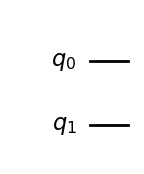

f2


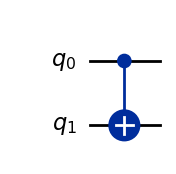

f3


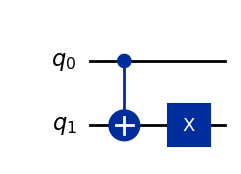

f4


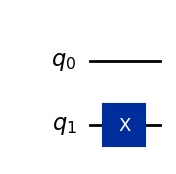

In [ ]:
for i in range(4):
  print ("f"+str(i+1))
  display(deutsch_function(i+1).draw('mpl'))

In [ ]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

f1


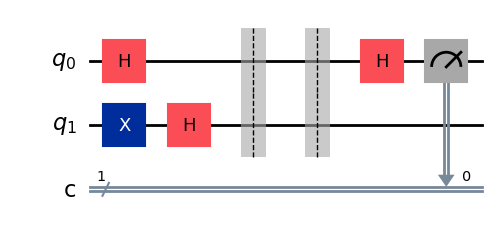

f2


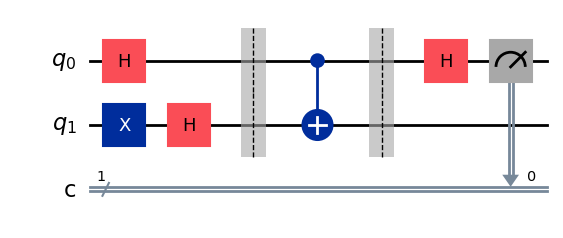

f3


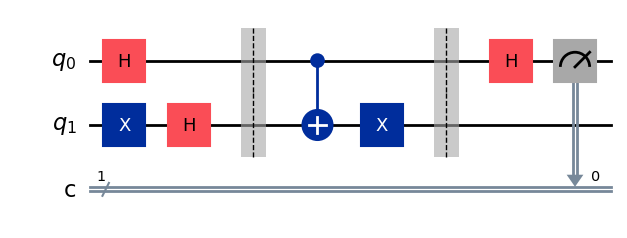

f4


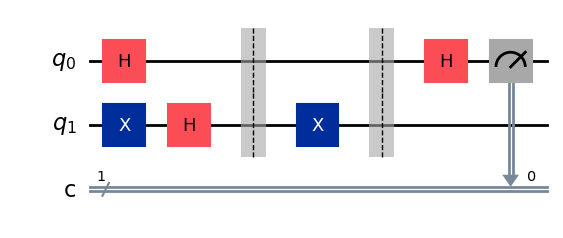

In [ ]:
for i in range(4):
  print ("f"+str(i+1))
  display(compile_circuit(deutsch_function(i+1)).draw('mpl'))

In [ ]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"




'f1'

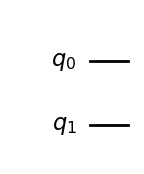

'f1 is constant'

'f2'

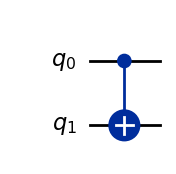

'f2 is balanced'

'f3'

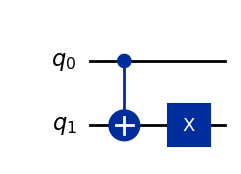

'f3 is balanced'

'f4'

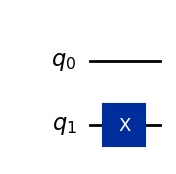

'f4 is constant'

In [ ]:
for i in range(4):
  f = deutsch_function(i+1)
  display("f"+str(i+1))
  display(f.draw('mpl'))
  display("f"+str(i+1)+" is "+deutsch_algorithm(f))

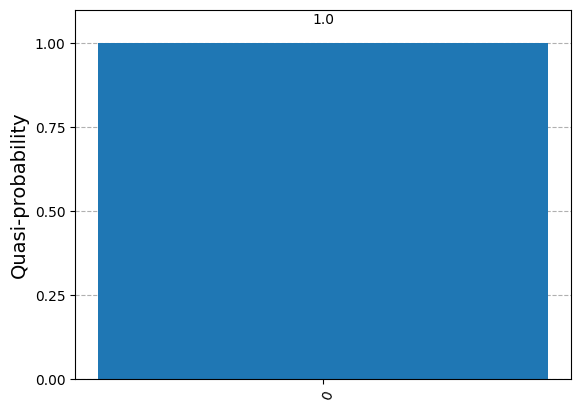

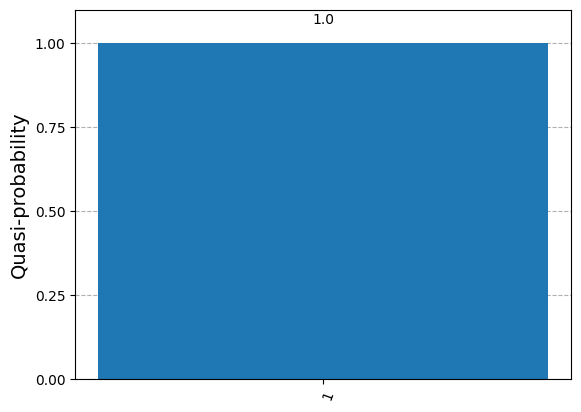

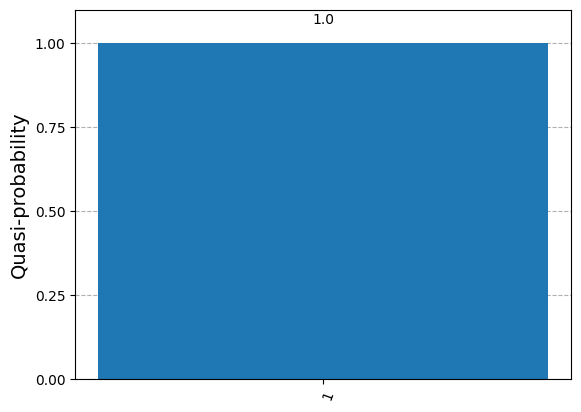

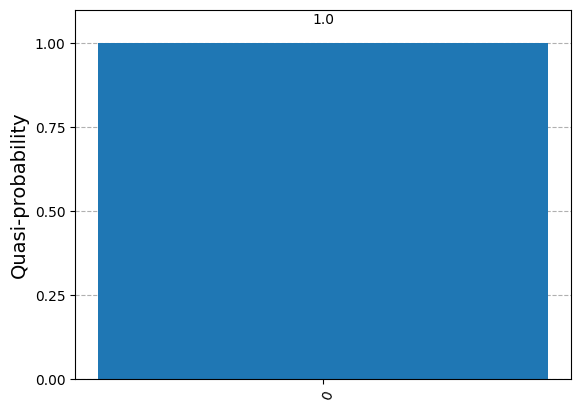

In [ ]:
for i in range (4):

  f = deutsch_function(i+1)
  qc = compile_circuit(f)

  measurement= Sampler().run(qc, shots=1000).result().quasi_dists[0].binary_probabilities()
  display(plot_histogram(measurement))

# Deutsch-Jozsa algorithm

In [ ]:
def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

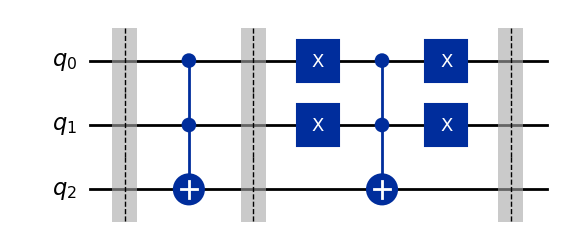

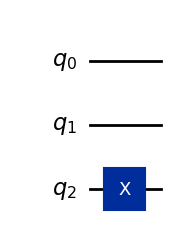

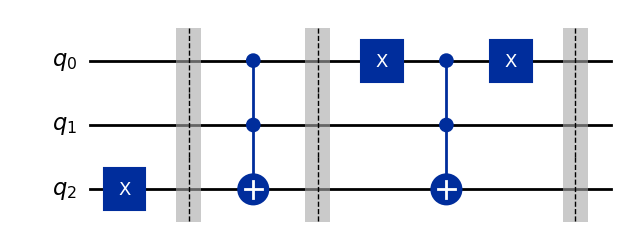

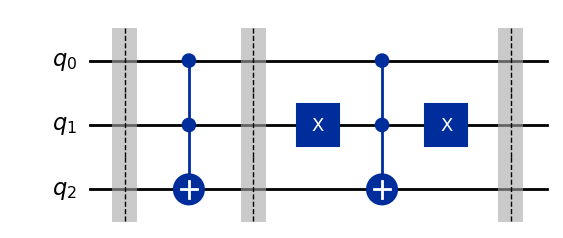

In [ ]:
for i in range(4):
  display(dj_function(2).draw('mpl'))

In [ ]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))

    #display(qc.draw('mpl'))
    return qc

In [ ]:

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    print(measurements)
    if "1" in measurements[0]:
        return "balanced"
    return "constant"


def dj_algorithm_sampler(function: QuantumCircuit):
      qc = compile_circuit(function)
      measurement= Sampler().run(qc, shots=1000).result().quasi_dists[0].binary_probabilities()
      display(plot_histogram(measurement))

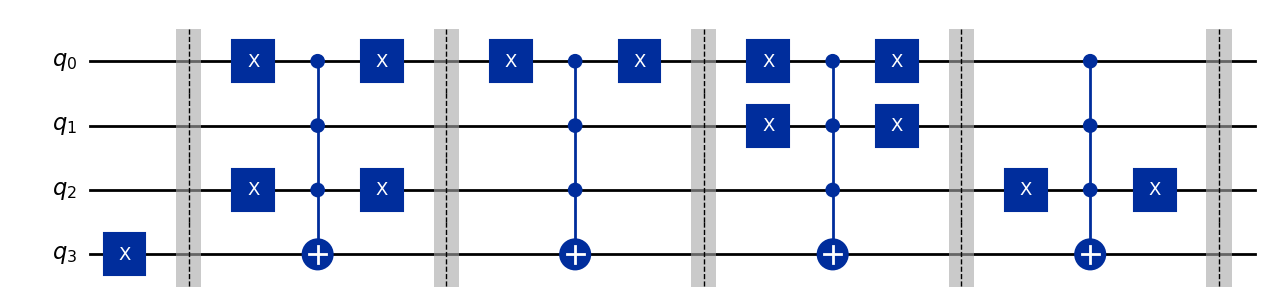

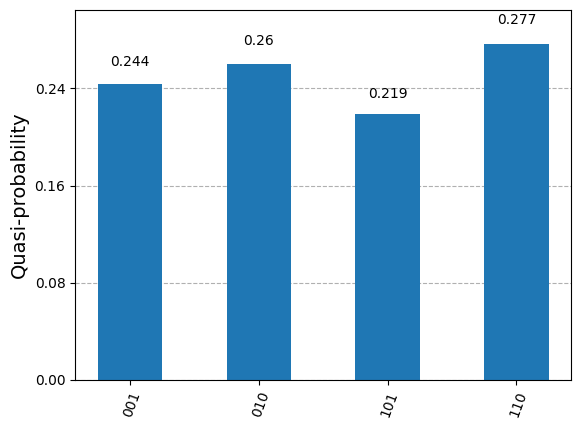

['101']


'balanced'

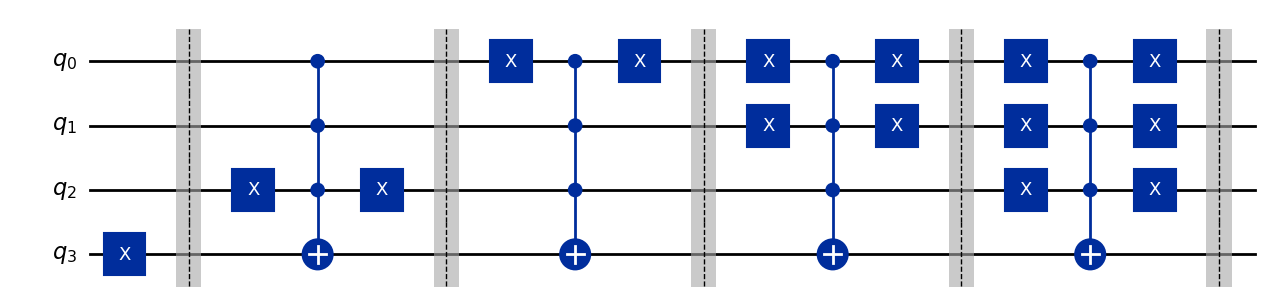

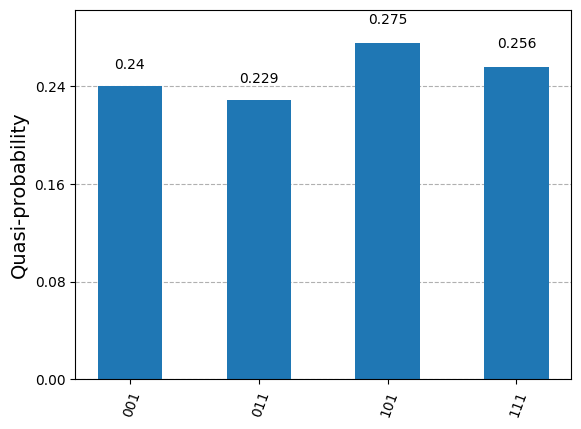

['001']


'balanced'

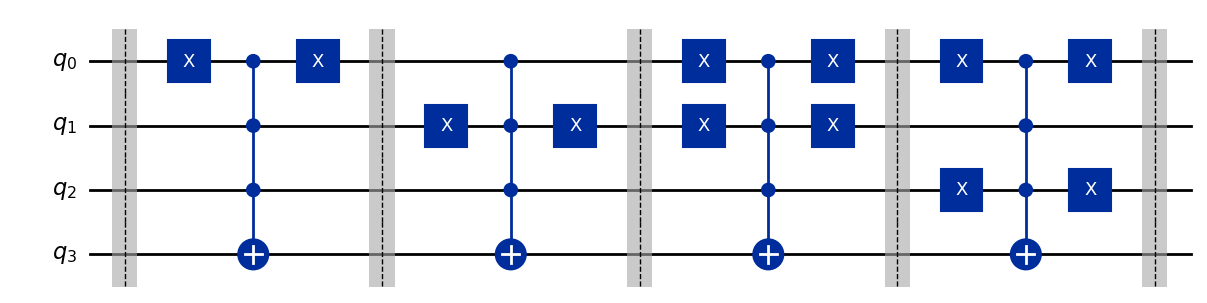

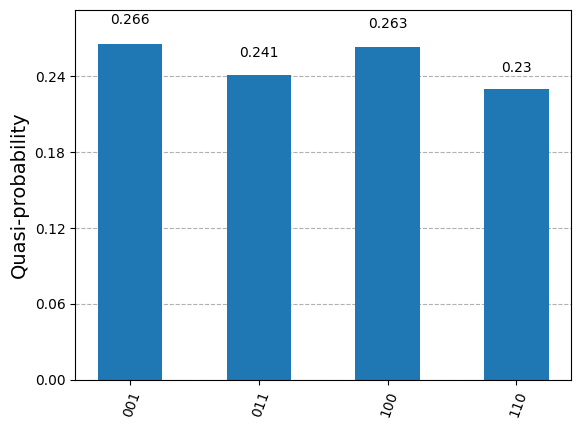

['100']


'balanced'

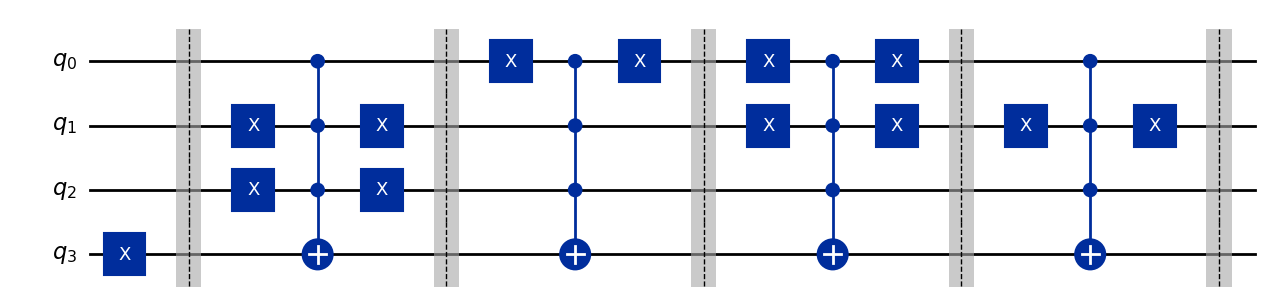

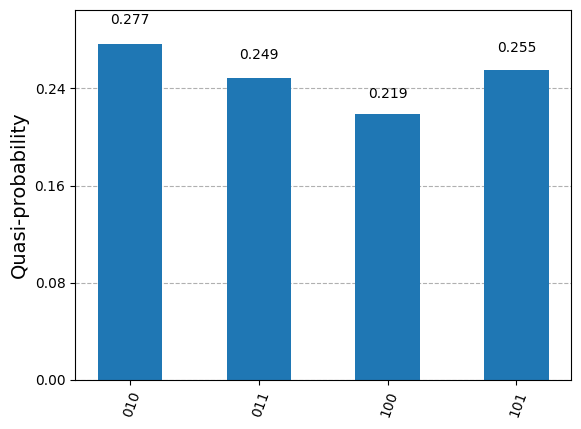

['010']


'balanced'

In [ ]:
for i in range(4):
  f = dj_function(3)
  display(f.draw('mpl'))
  dj_algorithm_sampler(f)
  display(dj_algorithm(f))


In [ ]:
#classical
import random

def generate_random_function(n):

    if random.randint(0,2):
        generated_function = [random.randint(0,1)] * 2**n
    else:
        generated_function = [0] * 2** (n-1) + [1] * 2**(n-1)
        random.shuffle(generated_function)
    return generated_function

def evaluate_function(f):

    resoults = []
    for i in range(int(len(f)/2)+1):

        resoults.append(f[i])
    if all(r == resoults[0] for r in resoults):
        return "Constant"
    else:
        return "Balanced"



In [ ]:
f = generate_random_function(3)
print(f)
ev_f = evaluate_function(f)
print(ev_f)


[1, 1, 1, 1, 1, 1, 1, 1]
Constant


# Bernstein-Vazirani alghoritm

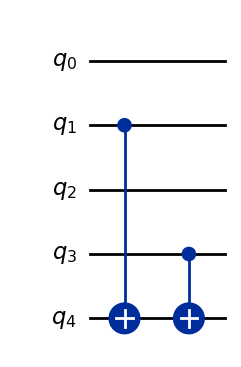

In [ ]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


display(bv_function("1010").draw('mpl'))



In [ ]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function("1010")))

'1010'

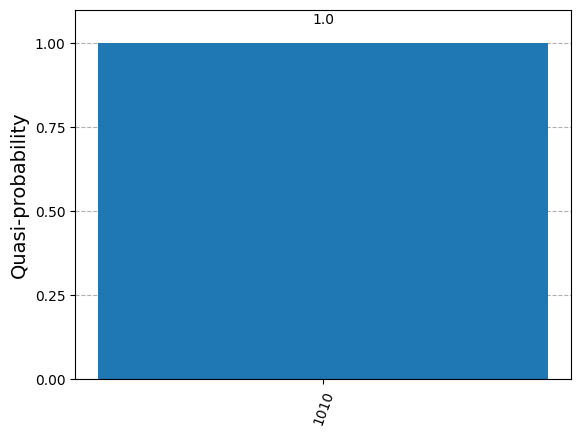

In [ ]:
def bv_algorithm_Sampler(function: QuantumCircuit):
    qc = compile_circuit(function)
    measurement= Sampler().run(qc, shots=1000).result().quasi_dists[0].binary_probabilities()
    display(plot_histogram(measurement))
(bv_algorithm_Sampler(bv_function("1010")))